## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing Data

In [2]:
train=pd.read_csv('training_obl.csv')
test=pd.read_csv('test_obl.csv')

## Enquiring Data

In [3]:
train.head()

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
0,1,339,4,5,147,62,5,95,3,1,2996
1,2,206,7,6,133,93,1,87,6,1,19918
2,3,323,3,3,145,57,4,76,5,2,1835
3,4,357,6,2,72,96,5,68,6,5,13432
4,5,320,4,7,108,90,3,61,4,3,4584


In [4]:
test.head()

,id,Area(total),Nbedroom,Nwashroom,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade
0,1,218,5,1,112,68,1,74,3,4
1,2,235,6,1,112,60,4,84,3,2
2,3,269,3,1,61,57,5,82,4,1
3,4,376,2,6,98,54,5,95,1,1
4,5,353,6,3,108,83,1,64,4,1


In [5]:
pandas_profiling.ProfileReport(train)

Number of variables,11
Number of observations,900
Total Missing (%),0.0%
Total size in memory,77.4 KiB
Average record size in memory,88.1 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
train.describe()

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000
mean,450.500000,302.470000,4.447778,3.984444,99.773333,75.481111,3.100000,76.382222,3.511111,3.04000,7384.633333
std,259.951919,57.465182,1.705369,1.996042,29.190254,14.542435,1.421666,10.394152,1.726225,1.41522,6111.214287
min,1.000000,200.000000,2.000000,1.000000,50.000000,50.000000,1.000000,60.000000,1.000000,1.00000,549.000000
25%,225.750000,252.750000,3.000000,2.000000,74.000000,62.750000,2.000000,68.000000,2.000000,2.00000,2870.750000
50%,450.500000,304.000000,4.000000,4.000000,99.000000,75.000000,3.000000,75.000000,4.000000,3.00000,5066.000000
75%,675.250000,352.000000,6.000000,6.000000,124.250000,88.000000,4.000000,86.000000,5.000000,4.00000,9934.250000
max,900.000000,400.000000,7.000000,7.000000,150.000000,100.000000,5.000000,95.000000,6.000000,5.00000,24851.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
id             900 non-null int64
Area(total)    900 non-null int64
Nbedrooms      900 non-null int64
Nwashrooms     900 non-null int64
Roof(Area)     900 non-null int64
Lawn(Area)     900 non-null int64
Nfloors        900 non-null int64
API            900 non-null int64
ANB            900 non-null int64
Grade          900 non-null int64
Price          900 non-null int64
dtypes: int64(11)
memory usage: 77.4 KB


<i>All are integer values</i>

In [8]:
train.columns

Index(['id', 'Area(total)', 'Nbedrooms', 'Nwashrooms', 'Roof(Area)',
       'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade', 'Price'],
      dtype='object')

1.1310213066126527
0.08536703914309429


C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


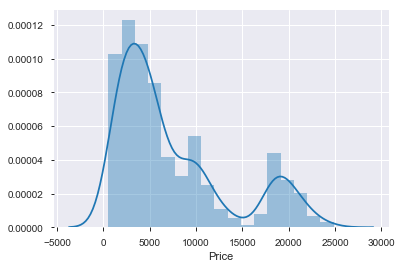

In [9]:
%matplotlib inline
sns.distplot(train.Price)
print(train.Price.skew())
print(train.Price.kurt())

In [10]:
train[train['Area(total)']-train['Roof(Area)']-train['Lawn(Area)']<0]

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
1,2,206,7,6,133,93,1,87,6,1,19918
39,40,220,5,4,132,91,3,74,4,1,4237
46,47,221,3,2,141,97,3,87,1,3,1131
120,121,218,4,4,137,100,5,84,2,4,3489
122,123,208,7,7,147,70,1,69,6,2,21034
244,245,232,2,7,144,91,1,64,2,2,3017
284,285,204,4,4,142,95,1,84,5,3,2672
502,503,216,4,2,145,73,2,78,5,3,2438
571,572,201,5,1,147,70,1,93,6,2,4965
630,631,221,4,4,143,94,5,63,5,1,3048


In [11]:
train.shape

(900, 11)

In [12]:
train['Roof(Area)'].describe()

count    900.000000
mean      99.773333
std       29.190254
min       50.000000
25%       74.000000
50%       99.000000
75%      124.250000
max      150.000000
Name: Roof(Area), dtype: float64


 mu = 7384.63 and sigma = 6107.82


 mu = 8.56 and sigma = 0.86



C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0.98,'After transformation')

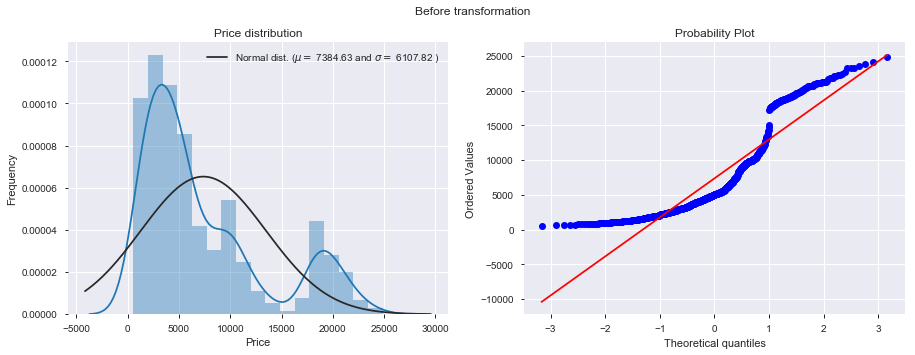

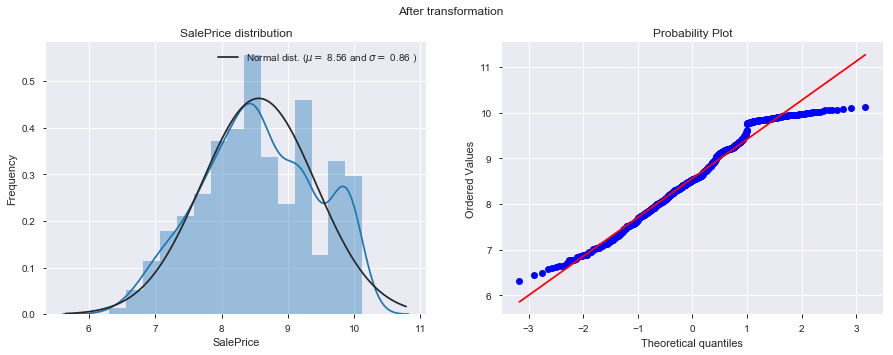

In [13]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['Price'] , fit=norm);
(mu, sigma) = norm.fit(train['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['Price'], plot=plt)
plt.suptitle('Before transformation')

# Apply transformation
train['SalePrice'] = np.log1p(train.Price )
# New prediction
# y_train = train.SalePrice.values
# y_train_orig = train.Price


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

In [14]:
train.columns

Index(['id', 'Area(total)', 'Nbedrooms', 'Nwashrooms', 'Roof(Area)',
       'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade', 'Price', 'SalePrice'],
      dtype='object')

In [15]:
train=train.drop(columns=['SalePrice'])

In [16]:
train.columns[:-1:]

Index(['id', 'Area(total)', 'Nbedrooms', 'Nwashrooms', 'Roof(Area)',
       'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade'],
      dtype='object')

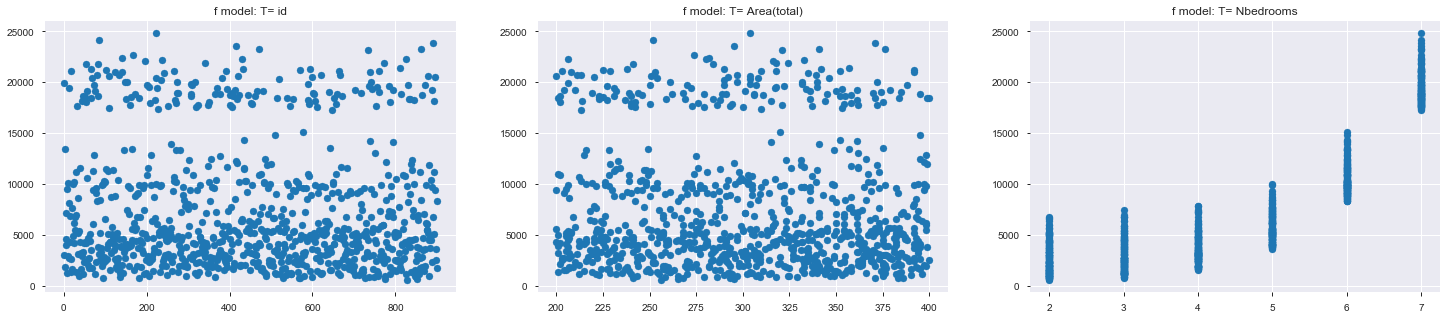

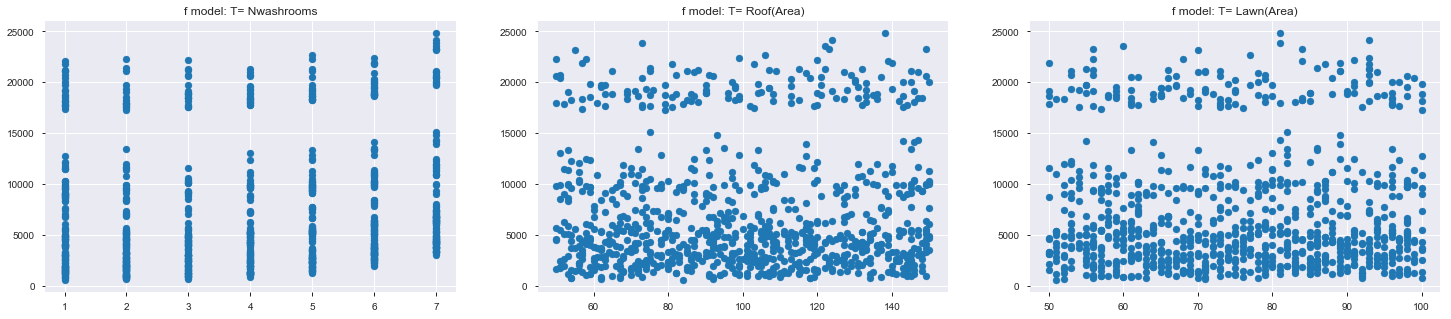

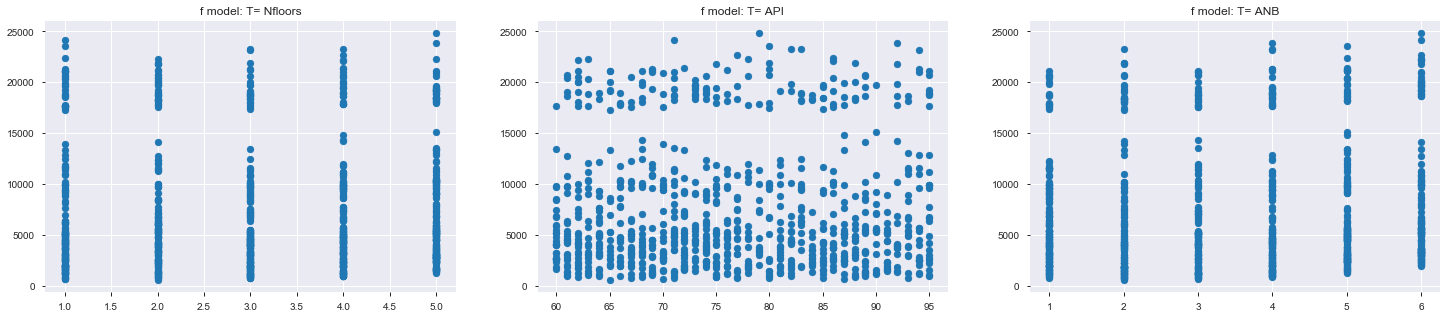

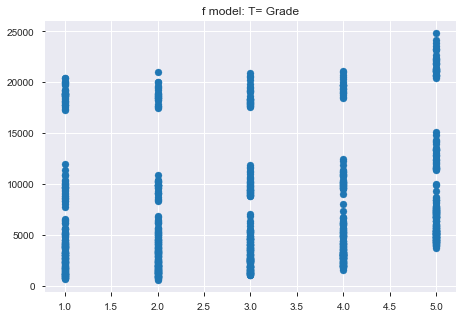

In [17]:
vars = train.columns[:-1:]
# vars = numerical_features
figures_per_time = 3
count = 0 
y = train.Price
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,3)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1

## Training

### Error metrics

In [18]:
from sklearn.metrics import mean_squared_error
def rmse(y_actual,y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

### Train Test Split

In [21]:
train.columns[1:-1:]

Index(['Area(total)', 'Nbedrooms', 'Nwashrooms', 'Roof(Area)', 'Lawn(Area)',
       'Nfloors', 'API', 'ANB', 'Grade'],
      dtype='object')

In [22]:
y=train.Price
x=train[train.columns[1:-1:]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Light GBM

In [23]:
from lightgbm import LGBMRegressor

In [24]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4, #was 3
                                       learning_rate=0.01, 
                                       n_estimators=9000, #8000
                                       max_bin=100, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2, # 'was 0.2'
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [25]:
lightgbm.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7,
       importance_type='split', learning_rate=0.01, max_bin=100,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=9000, n_jobs=-1, num_leaves=4,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [26]:
predictions=lightgbm.predict(X_test)

In [27]:
print("Error=",rmse(y_test,predictions))

Error= 140.52979281907702


### Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor(max_depth=10,n_estimators=1000)

In [30]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
predictions=model.predict(X_test)

In [32]:
print("Error=",rmse(y_test,predictions))

Error= 373.78602157369204


### Gradient Boosting Regressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [35]:
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [36]:
predictions=GBR.predict(X_test)

In [37]:
print("Error=",rmse(y_test,predictions))

Error= 156.0035656500506


### XGBoost

In [38]:
from xgboost import XGBRegressor

In [61]:
model = XGBRegressor(#colsample_bytree=0.4,
                 #gamma=0,                
                 learning_rate=0.01,
                 max_depth=3,
                 #min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 #reg_alpha=0.75,
                 #reg_lambda=0.45,
                 #subsample=0.6,
                 seed=42)

In [62]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [63]:
predictions=model.predict(X_test)

In [64]:
print("Error=",rmse(y_test,predictions))

Error= 127.26161144790683


### ADA Boost

In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [44]:
model=AdaBoostRegressor(learning_rate=0.01,
                 n_estimators=1000,
                 loss='linear')

In [45]:
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=1000, random_state=None)

In [46]:
predictions=model.predict(X_test)

In [47]:
print("Error=",rmse(y_test,predictions))

Error= 927.5746286050274


### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
model=DecisionTreeRegressor()

In [50]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
predictions=model.predict(X_test)

In [52]:
print("Error=",rmse(y_test,predictions))

Error= 466.66175592654304


In [53]:
pd.read_csv('sample.csv').head()

,id,Price
0,1,122
1,2,149
2,3,194
3,4,185
4,5,198


In [54]:
train.columns

Index(['id', 'Area(total)', 'Nbedrooms', 'Nwashrooms', 'Roof(Area)',
       'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade', 'Price'],
      dtype='object')

In [55]:
test.columns

Index(['id', 'Area(total)', 'Nbedroom', 'Nwashroom', 'Roof(Area)',
       'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade'],
      dtype='object')

In [57]:
test=test.rename(columns={"Nbedroom":"Nbedrooms","Nwashroom":"Nwashrooms"})

In [58]:
test.head()

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade
0,1,218,5,1,112,68,1,74,3,4
1,2,235,6,1,112,60,4,84,3,2
2,3,269,3,1,61,57,5,82,4,1
3,4,376,2,6,98,54,5,95,1,1
4,5,353,6,3,108,83,1,64,4,1


In [59]:
test_data=test[test.columns[1::]]

In [67]:
ans=model.predict(test_data)

In [68]:
df=pd.DataFrame({"id":test.id,"Price":ans})

In [70]:
df.to_csv('xgb.csv',index=False)

In [71]:
df

,id,Price
0,1,4826.427246
1,2,8762.332031
2,3,1654.293823
3,4,2676.047607
4,5,8831.057617
5,6,4109.247559
6,7,18711.138672
7,8,2527.164307
8,9,3715.598389
9,10,14452.333984
